
* movie_name - Name of the movie
*year - Release year
*run_time - Total movie run time
*genre - Genre of the movie
*rating - Rating of the movie (10점 만점)
*votes - Number of votes in IMDB website
*gross(in $) - Gross Box Office of the movie

In [2]:
!pip install category_encoders 
!pip3 install xgboost==1.7.2
!pip3 install pdpbox
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=ff6f9c241f159c04348651c1b72019fff6da01685b4588ae42217f8b0a2a1917
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12059995 sha256=493e6af93bbdc5ea69cda64ae8cf9ce450f1a13c2c4d941309743548b44bc8c2
  Stor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/IMDB_data.csv")
df.head()

,Unnamed: 0,movie_name,year,runtime,genre,rating,votes,gross(in $)
0,0,Knives Out,2019,130 min,thriller,7.9,705622.0,165359751.0
1,1,The Hunger Games,2012,142 min,thriller,7.2,927499.0,408010692.0
2,2,The Dark Knight,2008,152 min,thriller,9.0,2675531.0,534858444.0
3,3,Inception,2010,148 min,thriller,8.8,2373682.0,292576195.0
4,4,Black Swan,2010,108 min,thriller,8.0,776577.0,106954678.0


# 데이터 취합

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/thriller.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/action.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/crime.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/horror.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/adventure.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/mystery.csv")
df7 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/family.csv")
df8 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/fantasy.csv")
df9 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/scifi.csv")
df10 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/war.csv")
df11 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/history.csv")
df12 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/animation.csv")
df13 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/biography.csv")
df14 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/sports.csv")
df15 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/film-noir.csv")
df16 = pd.read_csv("https://raw.githubusercontent.com/chanseon/section2_project/main/data/romance.csv")


In [ ]:
df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16]
lst = ['thriller','action','crime','horror','adventure','mystery','family','fantasy','scifi','war','history','animation','biography','sports','film_noir','romance']

In [ ]:
for i in range(len(df1)):
  df1['genre'][i] = lst[0]
for i in range(len(df2)):
  df2['genre'][i] = lst[1]
for i in range(len(df3)):
  df3['genre'][i] = lst[2]
for i in range(len(df4)):
  df4['genre'][i] = lst[3]
for i in range(len(df5)):
  df5['genre'][i] = lst[4]
for i in range(len(df6)):
  df6['genre'][i] = lst[5]
for i in range(len(df7)):
  df7['genre'][i] = lst[6]
for i in range(len(df8)):
  df8['genre'][i] = lst[7]
for i in range(len(df9)):
  df9['genre'][i] = lst[8]
for i in range(len(df10)):
  df10['genre'][i] = lst[9]
for i in range(len(df11)):
  df11['genre'][i] = lst[10]
for i in range(len(df12)):
  df12['genre'][i] = lst[11]
for i in range(len(df13)):
  df13['genre'][i] = lst[12]
for i in range(len(df14)):
  df14['genre'][i] = lst[13]
for i in range(len(df15)):
  df15['genre'][i] = lst[14]
for i in range(len(df16)):
  df16['genre'][i] = lst[15]

<ipython-input-6-a373a6242af0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genre'][i] = lst[0]
<ipython-input-6-a373a6242af0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genre'][i] = lst[1]


KeyboardInterrupt: ignored

In [ ]:
def dropping(df):
  df.drop(['movie_id','certificate','description','director_id','star','director','star_id'],axis=1,inplace=True)
  df.dropna(subset=['gross(in $)'],how='any',axis=0,inplace=True)
  return df

#해당 필요없는 내용들을 지우고, gross가 NAN인 애들은 전부 드랍하여 업데이트
for i in df_list:
  dropping(i)

In [ ]:
df_main =  pd.concat(df_list)
df =df_main.reset_index(drop=True)

# EDA

In [4]:
df.loc[:,'gross'] = df.loc[:,'gross(in $)']
df.drop('gross(in $)',axis=1,inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0     0
movie_name     0
year           0
runtime       12
genre          0
rating         0
votes          0
gross          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25039 entries, 0 to 25038
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25039 non-null  int64  
 1   movie_name  25039 non-null  object 
 2   year        25039 non-null  int64  
 3   runtime     25027 non-null  object 
 4   genre       25039 non-null  object 
 5   rating      25039 non-null  float64
 6   votes       25039 non-null  float64
 7   gross       25039 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.5+ MB


###### 연도 전처리

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25039 entries, 0 to 25038
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25039 non-null  int64  
 1   movie_name  25039 non-null  object 
 2   year        25039 non-null  int64  
 3   runtime     25027 non-null  object 
 4   genre       25039 non-null  object 
 5   rating      25039 non-null  float64
 6   votes       25039 non-null  float64
 7   gross       25039 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [9]:
df.duplicated().sum()

0

<BarContainer object of 109 artists>

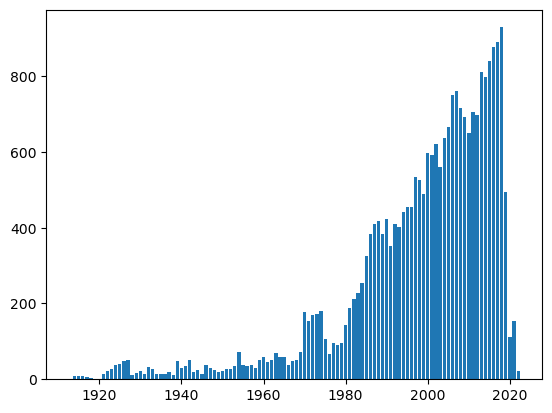

In [10]:
#연도별 분포 시각화
plt.bar(df.year.value_counts().index,height=df.year.value_counts())

In [11]:
df.year = df.year.astype(int)
df[df.year >= 2000]

,movie_name,year,runtime,genre,rating,votes,gross
0,Knives Out,2019,130 min,thriller,7.9,705622.0,165359751.0
1,The Hunger Games,2012,142 min,thriller,7.2,927499.0,408010692.0
2,The Dark Knight,2008,152 min,thriller,9.0,2675531.0,534858444.0
3,Inception,2010,148 min,thriller,8.8,2373682.0,292576195.0
4,Black Swan,2010,108 min,thriller,8.0,776577.0,106954678.0
...,...,...,...,...,...,...,...
25029,Love Me True,2015,88 min,romance,5.2,43.0,19887.0
25030,Le grand rôle,2004,89 min,romance,5.6,175.0,35555.0
25036,True Love Zombie,2012,86 min,romance,4.4,46.0,100.0
25037,Far from India,2003,101 min,romance,6.5,30.0,8500.0


In [12]:
#2000년도 이상인 애들만 모아서 정리
#df = df[df.year >= 2000].reset_index(drop=True)
#df

##### 런타임 전처리 (1차에서는 미적용)
-> 모델에 적용할 때 혹시 문제가 된다면 짧은 김 너무김으로 해보자

In [13]:
#런타임 nan값 제거
bye_runtime = list(df.runtime[df.runtime.isna()].index)
df.drop(bye_runtime,axis=0,inplace=True)
#runtime을 int로 변환 작업
df.runtime = df.runtime.str.replace('min','').astype(int)

<BarContainer object of 174 artists>

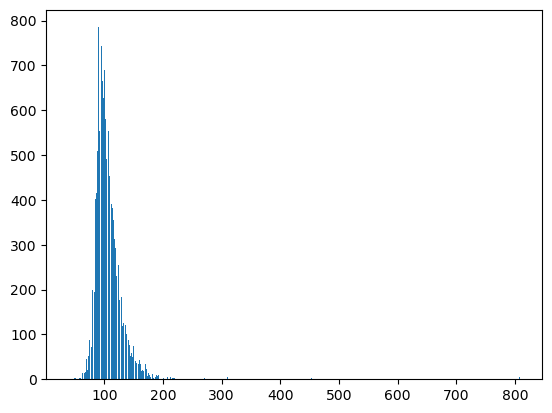

In [14]:
#runtime 분포 시각화
plt.bar(df.runtime.value_counts().index,height=df.runtime.value_counts().values)

In [15]:
#250시간 이상으로 있는 애들이 있음 -> 확인
df[df.runtime >250]

,movie_name,year,runtime,genre,rating,votes,gross
3054,La Flor,2018,808,thriller,7.4,743.0,4032.0
3526,The Weathered Underground,2010,310,thriller,6.2,62.0,137405.0
6296,The Weathered Underground,2010,310,action,6.2,62.0,137405.0
12367,The Weathered Underground,2010,310,adventure,6.2,62.0,137405.0
13481,Out 1,1971,776,mystery,7.5,1418.0,31539.0
13571,La Flor,2018,808,mystery,7.4,743.0,4032.0
16256,La Flor,2018,808,fantasy,7.4,743.0,4032.0
16410,The Weathered Underground,2010,310,fantasy,6.2,62.0,137405.0
17735,Gettysburg,1993,271,war,7.6,29791.0,10769960.0
17879,War and Peace,1965,453,war,8.3,7617.0,134686.0


##### rating 전처리 (10점 만점, 별점)
-> 모델에 적용할 때 문제가 된다면 0-2/2.1-4/4.1-6/6.1-8/8.1-10 으로 나눠서 해보기

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25027 entries, 0 to 25038
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_name  25027 non-null  object 
 1   year        25027 non-null  int64  
 2   runtime     25027 non-null  int64  
 3   genre       25027 non-null  object 
 4   rating      25027 non-null  float64
 5   votes       25027 non-null  float64
 6   gross       25027 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


<BarContainer object of 77 artists>

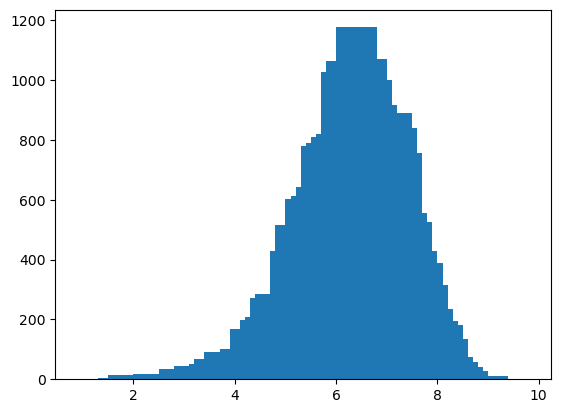

In [17]:
#raing 분포 시각화
plt.bar(df.rating.value_counts().index,height=df.rating.value_counts())

##### votes 전처리 -> 보류

In [18]:
df

,movie_name,year,runtime,genre,rating,votes,gross
0,Knives Out,2019,130,thriller,7.9,705622.0,165359751.0
1,The Hunger Games,2012,142,thriller,7.2,927499.0,408010692.0
2,The Dark Knight,2008,152,thriller,9.0,2675531.0,534858444.0
3,Inception,2010,148,thriller,8.8,2373682.0,292576195.0
4,Black Swan,2010,108,thriller,8.0,776577.0,106954678.0
...,...,...,...,...,...,...,...
25034,Corporal Kate,1926,80,romance,6.0,20.0,147000.0
25035,Thy Name Is Woman,1924,90,romance,5.7,22.0,208196.0
25036,True Love Zombie,2012,86,romance,4.4,46.0,100.0
25037,Far from India,2003,101,romance,6.5,30.0,8500.0


In [19]:
df.votes =df.votes.astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25027 entries, 0 to 25038
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_name  25027 non-null  object 
 1   year        25027 non-null  int64  
 2   runtime     25027 non-null  int64  
 3   genre       25027 non-null  object 
 4   rating      25027 non-null  float64
 5   votes       25027 non-null  int64  
 6   gross       25027 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


#####gross 전처리 -> 보류

In [21]:
#runtime 분포 시각화
df.gross = df.gross.astype(int)

In [22]:
df.head()

,movie_name,year,runtime,genre,rating,votes,gross
0,Knives Out,2019,130,thriller,7.9,705622,165359751
1,The Hunger Games,2012,142,thriller,7.2,927499,408010692
2,The Dark Knight,2008,152,thriller,9.0,2675531,534858444
3,Inception,2010,148,thriller,8.8,2373682,292576195
4,Black Swan,2010,108,thriller,8.0,776577,106954678


# 모델 (회귀모델)
 특정 영화가 얼마나 인기가 있을지를 예측하는 등의 문제에서는 회귀 모델을 이용하는 것

In [23]:
#런타임이 별점/gross에 영향을 미치는가
#매해마다 어떤 장르의 수익이 더 큰가/트렌드가 있는가
#별점이 높으면 gross에도 영향이 있는가
#모델로 할 내용: 별점 몇 점 이상을 받아야 gross가 증가하는가
#런타임도 어느정도 해야 gross가 증가하는가

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [25]:
# 최적 모델 학습 후, 성능 확인.
# 모델 해석을 위한 여러 수치적 지표, 시각화 기법 사용 -> 모델 작동 해석
# 1. base모델 선정, 성능 평가 0
# 2. Feature engineering으로 모델 성능 최적화
# 3. 문제 정의에 맞는 평가지표를 선택하여 모델의 성능 설명
# 4. 교차검증/hold-out 기법으로 학습성능과 일반화 성능 구분 제시
# 5. 여러 수치적 지표 및 permutation importance, pdp등을 활용하여 최종모델을 설명합니다. 시각화는 설명이 가장 중요합니다.
# 6. 1에서 제시한 가설을 해결하고 인사이트를 도출합니다.

In [26]:
target = 'gross'
X = df.drop([target,'movie_name'], axis=1) # 영화명은 딱히 필요하지 않을 것 같다 -> 성능 올라감
y = df[target]
# 데이터 3:7로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [27]:
#기준모델 - 영화의 수익 예측, 타겟(gross)의 평균값을 이용해서 기준모델 만듦. MAE로 지정
y_base = [y_train.mean()] * len(y_train)
print(f"기준모델의 MAE: {mean_absolute_error(y_train, y_base)}")

기준모델의 MAE: 35752343.363478385


In [28]:
#회귀 모델링
###randomforest
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(
        #random_state=42,
        #oob_score=True,
        n_jobs=-1
    )
)

pipe_rf.fit(X_train, y_train)

#예측
y_pred = pipe_rf.predict(X_val)
# 결과 확인
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('r2: ',r2_score(y_val, y_pred))
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

MAE:  11550333.48321347
r2:  0.8093558400727336
훈련 정확도:  0.9744949155776415
검증 정확도:  0.8093558400727336


In [29]:
###xgboost
pipe_xgb = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(
        #random_state=42,
        n_jobs=-1)
)

pipe_xgb.fit(X_train, y_train)

#예측
y_pred = pipe_xgb.predict(X_val)
# 결과 확인
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('r2: ',r2_score(y_val, y_pred))
print("훈련 정확도: ", pipe_xgb.score(X_train, y_train))
print("검증 정확도: ", pipe_xgb.score(X_val, y_val))

MAE:  12490701.802952144
r2:  0.8225312398927234
훈련 정확도:  0.9580999396170183
검증 정확도:  0.8225312398927234


# MDI-특성중요도 해석

In [30]:
pipe_rf

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['genre'],
                                mapping=[{'col': 'genre',
                                          'data_type': dtype('O'),
                                          'mapping': family        1
sports        2
romance       3
crime         4
action        5
fantasy       6
adventure     7
thriller      8
horror        9
mystery      10
biography    11
history      12
scifi        13
war          14
animation    15
film_noir    16
NaN          -2
dtype: int64}])),
                ('randomforestregressor', RandomForestRegressor(n_jobs=-1))])

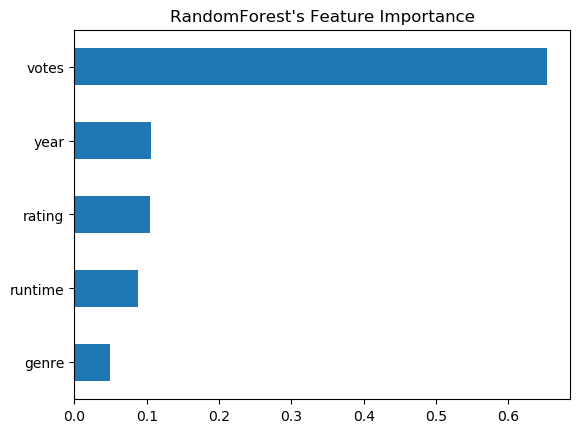

Text(0.5, 1.0, 'Cardinality')

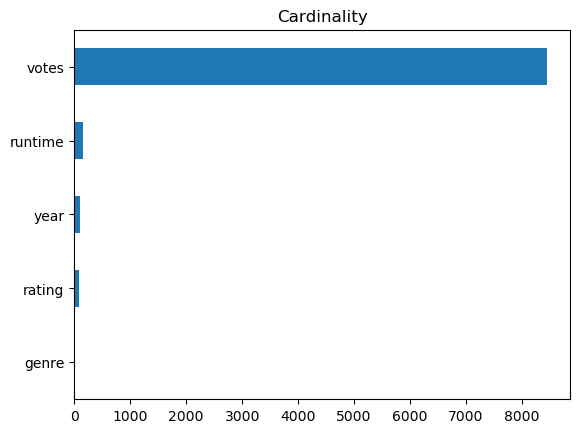

In [31]:
rf = pipe_rf[1]
rf_importances = pd.Series(rf.feature_importances_, list(X))

rf_importances.sort_values().plot.barh()
plt.title("RandomForest's Feature Importance")
plt.show();

X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")

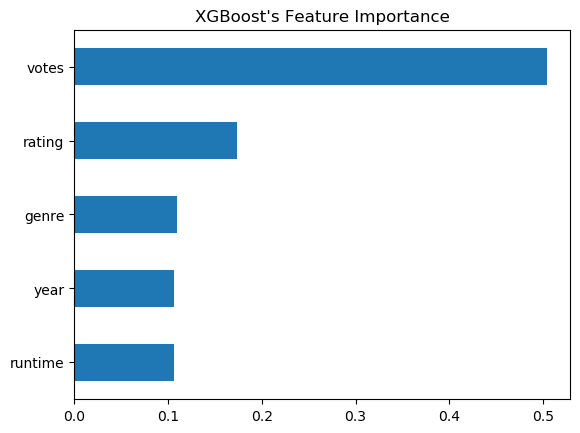

In [32]:
# xgb모델 MDI 특성 중요도 시각화
xgb = pipe_xgb[1]
xgb_importances = pd.Series(xgb.feature_importances_, list(X))

xgb_importances.sort_values().plot.barh()
plt.title("XGBoost's Feature Importance")
plt.show();

# 순열중요도

In [33]:
from eli5.sklearn import PermutationImportance
import eli5

#####randomforest
permuter = PermutationImportance(
    pipe_rf[1],
    scoring='neg_mean_absolute_error', #r2
    n_iter=10,
    #random_state=
)

# val dataset 특성 Ordinal Encoding
X_val_processed = pipe_rf[0].transform(X_val)

feature_names = list(X)

permuter.fit(X_val_processed, y_val)
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
35295547.3842 ± 828133.0387,votes
8587075.9868 ± 190586.7117,rating
5893779.3158 ± 396702.9785,year
3809891.9707 ± 178576.9144,runtime
1493489.6104 ± 259267.6631,genre


In [34]:
#####xgboost
permuter_2 = PermutationImportance(
    pipe_xgb.named_steps['xgbregressor'],
    scoring ='neg_mean_absolute_error',
    n_iter=10,
    #random_state=2
)

# val dataset 특성 Ordinal Encoding
X_val_processed2 = pipe_xgb[0].transform(X_val)

# Score 계산
feature_names2 = list(X)
permuter_2.fit(X_val_processed2, y_val)
eli5.show_weights(
    permuter_2,
    top=None,
    feature_names=feature_names2
)

Weight,Feature
33901926.3807 ± 720841.7440,votes
6877412.5177 ± 252133.8857,rating
4646810.3441 ± 368976.4393,year
3085304.1714 ± 198183.2721,runtime
2252135.7698 ± 426808.8119,genre


In [35]:
#위의 내용은 각 특성이 예측 성능에 얼마나 영향을 주는지 쉽게 파악할 수 있음.

#PDP

In [36]:
X_val.iloc[[3]]

,year,runtime,genre,rating,votes
23050,1987,89,romance,6.0,3889


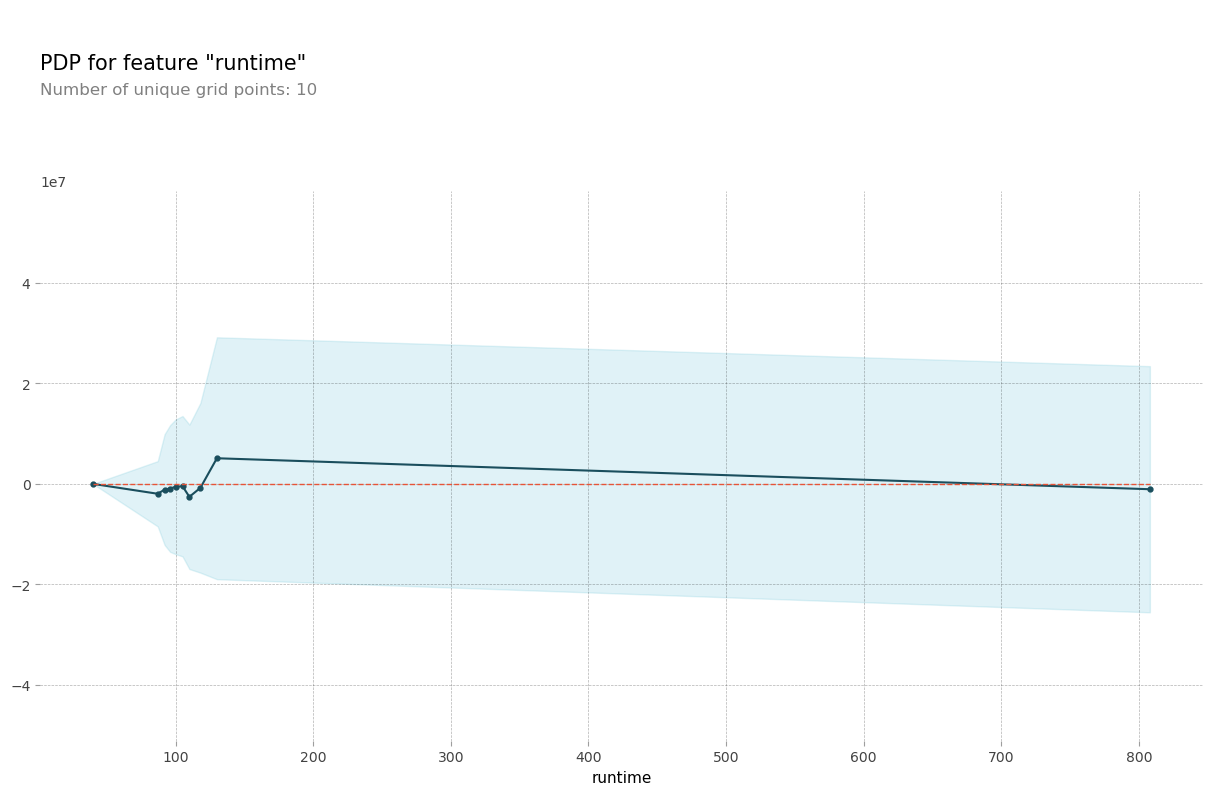

In [41]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

# runtime에 대한 PDP
selected_feature = 'runtime'
pdp_dist = pdp_isolate(
    model=pipe_xgb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);

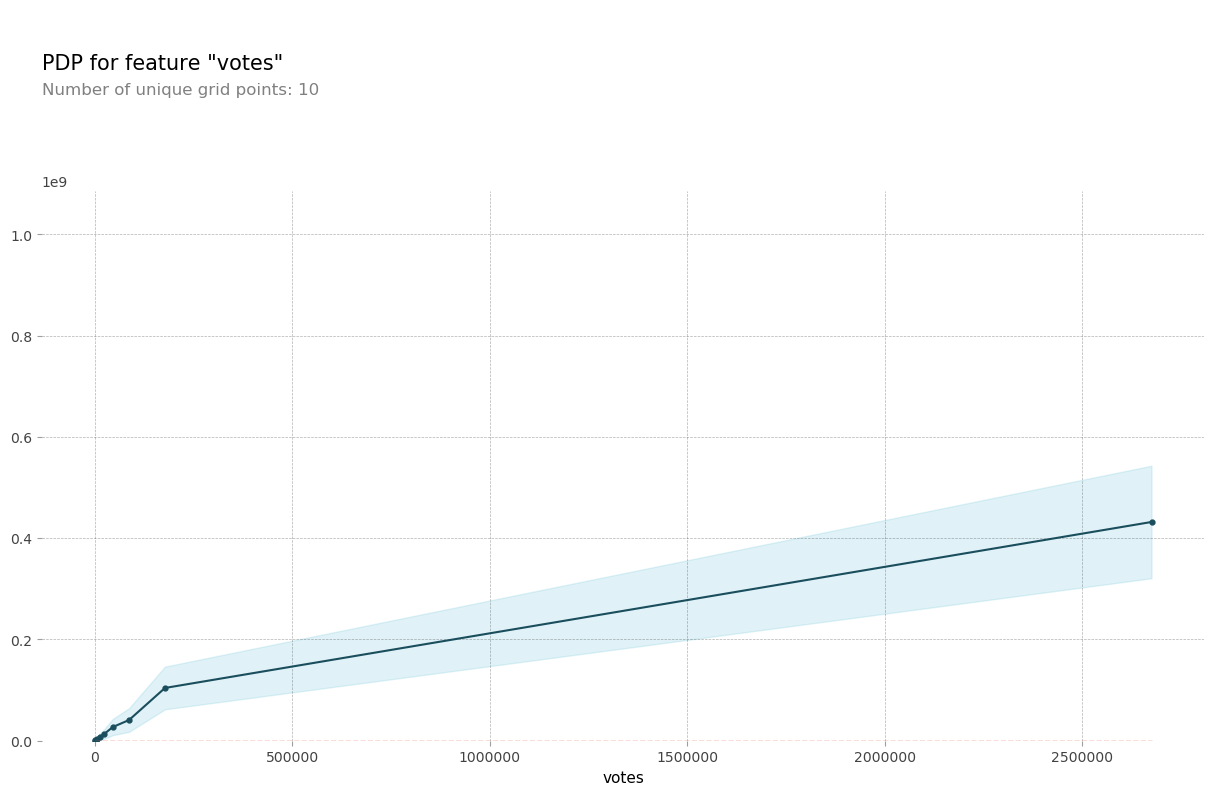

In [42]:
selected_feature = 'votes'
pdp_dist = pdp_isolate(
    model=pipe_xgb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);

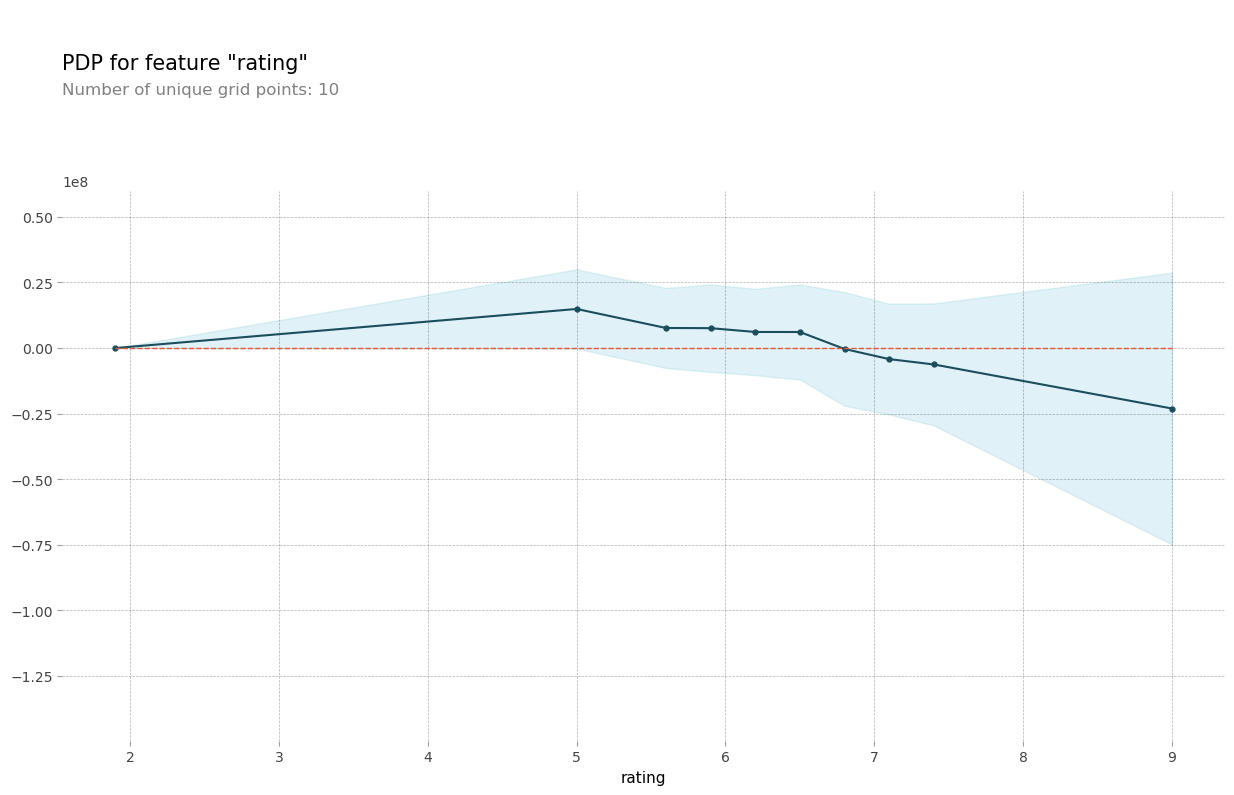

In [43]:
selected_feature = 'rating'
pdp_dist = pdp_isolate(
    model=pipe_xgb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);

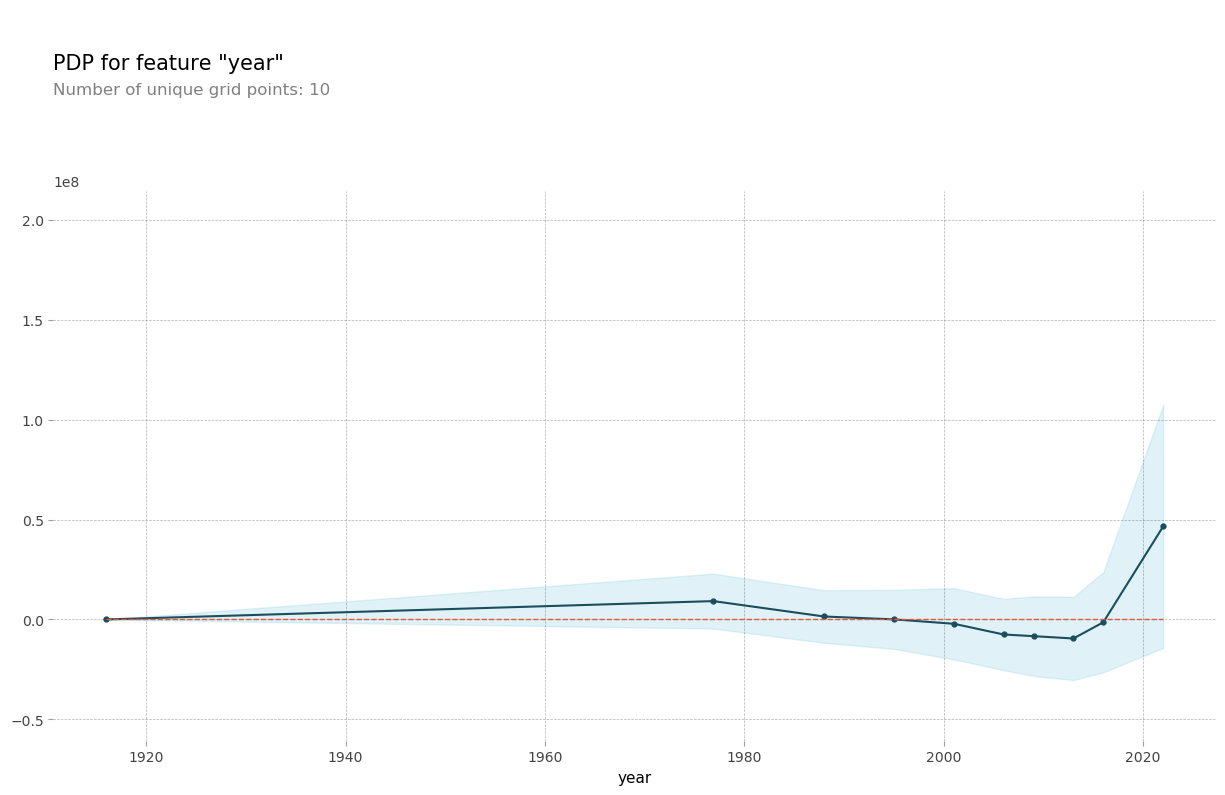

In [44]:
selected_feature = 'year'
pdp_dist = pdp_isolate(
    model=pipe_xgb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);